# Brief Overview: 
Entering high school students make program choices among vocational program and academic program. Their choice might be modeled using their writing score and their social economic status.
**Academic Programs** are more likely to demand essays and logical reasoning, whereas **vocational Programs** are about practical hands-on training and learning tangible skills.
The basic difference between these two is theory versus practice. An academic school generally teaches theoretical knowledge and broad-based research skills, while a vocational school teaches hands-on, applied skills such as carpentry, auto mechanics and hairdressing.

**University of Tesas wants to launch some new programs and want to know there target audience(Which student should be be pitched for which course/program). They hired you to do the analysis and predict which program a student will choose out of Academic Programs and Vocational Programs on the bases of the information given such as socio-economic status, the type of school attended (public or private), gender and their prior reading, writing, maths and science scores.**

# Upload Required Libraries

In [1]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings( "ignore")
sns.set()

# Importing data

In [2]:
df=pd.read_csv("Program_Choice.csv")

In [3]:
df.head()

,id,female,ses,schtyp,prog,read,write,math,science,socst,honors,awards,cid
0,45,female,low,public,vocation,34,35,41,29,26,not enrolled,0,1
1,108,male,middle,public,vocation,34,33,41,36,36,not enrolled,0,1
2,15,male,high,public,vocation,39,39,44,26,42,not enrolled,0,1
3,67,male,low,public,vocation,37,37,42,33,32,not enrolled,0,1
4,153,male,middle,public,vocation,39,31,40,39,51,not enrolled,0,1


# EDA

## Shape

In [4]:
# Shape of the dataframe
df.shape

(200, 13)

**Data type of data features**

## Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       200 non-null    int64 
 1   female   200 non-null    object
 2   ses      200 non-null    object
 3   schtyp   200 non-null    object
 4   prog     200 non-null    object
 5   read     200 non-null    int64 
 6   write    200 non-null    int64 
 7   math     200 non-null    int64 
 8   science  200 non-null    int64 
 9   socst    200 non-null    int64 
 10  honors   200 non-null    object
 11  awards   200 non-null    int64 
 12  cid      200 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 20.4+ KB


## Null value Check

In [6]:
# Handling missing data
# Test whether there is any null value in our dataset or not. We can do this using isnull() method.
df.isnull().sum()

id         0
female     0
ses        0
schtyp     0
prog       0
read       0
write      0
math       0
science    0
socst      0
honors     0
awards     0
cid        0
dtype: int64

The above output shows that there is no “null” value in our dataset.

## Drop unwanted Features

In [7]:
df.drop("id",axis=1,inplace =True)

## Segregating Categorical & Continuous Features


In [8]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['female', 'ses', 'schtyp', 'prog', 'honors']
['read', 'write', 'math', 'science', 'socst', 'awards', 'cid']


## Duplicate Records Check

In [9]:
dups = df.duplicated()
print(f'Number of duplicate rows = {dups.sum()}')

Number of duplicate rows = 0


## Univariate Analysis

Let’s try to test whether any categorical attribute contains a “?” in it or not. At times there exists “?” or ” ” or any other such unexpected character.. Using `value_counts()` we can check for the presence of such characters which essentially mean that it is a missing value.

### Categorical Features

In [10]:
for cols in cat:
    print(cols)
    print(df[cols].value_counts())
    print('\n')

female
female    109
male       91
Name: female, dtype: int64


ses
middle    95
high      58
low       47
Name: ses, dtype: int64


schtyp
public     168
private     32
Name: schtyp, dtype: int64


prog
academic    105
vocation     95
Name: prog, dtype: int64


honors
not enrolled    147
enrolled         53
Name: honors, dtype: int64




The output of the above code snippet shows that there are no "?" present in the data set.

In [11]:
df[cat].describe().T

,count,unique,top,freq
female,200,2,female,109
ses,200,3,middle,95
schtyp,200,2,public,168
prog,200,2,academic,105
honors,200,2,not enrolled,147


### Numeric Features

In [12]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
read,200.0,52.230,10.252937,28.0,44.00,50.0,60.0,76.0
write,200.0,52.775,9.478586,31.0,45.75,54.0,60.0,67.0
math,200.0,52.645,9.368448,33.0,45.00,52.0,59.0,75.0
science,200.0,51.850,9.900891,26.0,44.00,53.0,58.0,74.0
socst,200.0,52.405,10.735793,26.0,46.00,52.0,61.0,71.0
awards,200.0,1.670,1.818691,0.0,0.00,1.0,2.0,7.0
cid,200.0,10.430,5.801152,1.0,5.00,10.5,15.0,20.0


#### Numeric Features Distribution

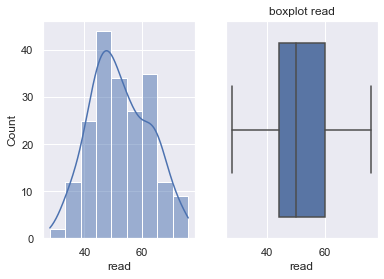

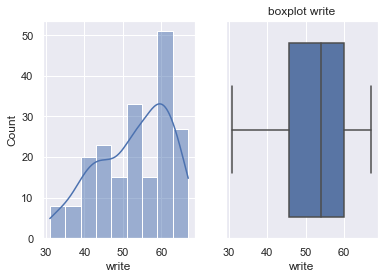

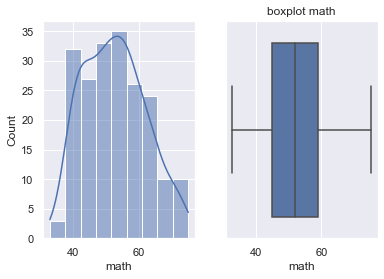

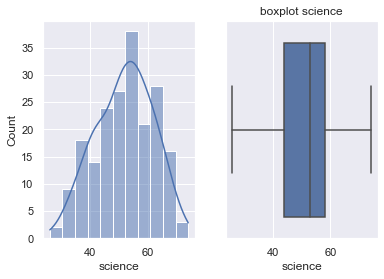

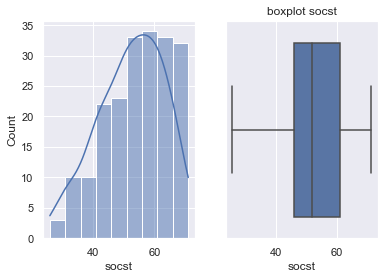

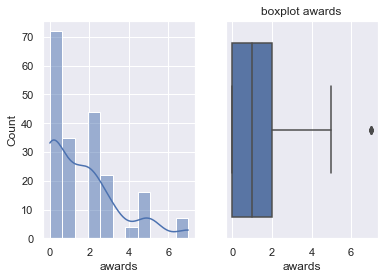

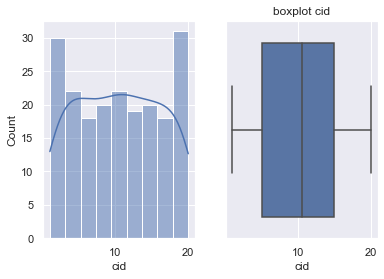

In [16]:
for col in num:
    fig,(axes0,axes1) = plt.subplots(1,2)
    sns.histplot(data=df,x=col,kde=True,ax=axes0)
    plt.title('histogram')
    sns.boxplot(data=df,x=col,ax=axes1)
    plt.title('boxplot '+str(col))
    plt.show();

In [ ]:
# fig, axes = plt.subplots(nrows=4,ncols=2)
# fig.set_size_inches(10,20)
# a = sns.distplot(df['read'] , ax=axes[0][0])
# a.set_title("read Distribution",fontsize=10) # for subject reading

# a = sns.boxplot(df['read'] , orient = "v" , ax=axes[0][1])
# a.set_title("read Boxplot",fontsize=10) # for subject reading

# a = sns.distplot(df['write'] , ax=axes[1][0])
# a.set_title("write Distribution",fontsize=10) #for subject writing

# a = sns.boxplot(df['write'] , orient = "v" , ax=axes[1][1])
# a.set_title("write Boxplot",fontsize=10) # for subject writing


# a = sns.distplot(df['math'] , ax=axes[2][0])
# a.set_title("math Distribution",fontsize=10) # for subject math

# a = sns.boxplot(df['math'] , orient = "v" , ax=axes[2][1])
# a.set_title("math Boxplot",fontsize=10) # for subject math

 
# a = sns.distplot(df['science'] , ax=axes[3][0]) 
# a.set_title("science Distribution",fontsize=10) # for subject science

# a = sns.boxplot(df['science'] , orient = "v" , ax=axes[3][1])
# a.set_title("science Boxplot",fontsize=10); # for subject science

# # plt.show()

In [ ]:
# fig, axes = plt.subplots(nrows=3,ncols=2)
# fig.set_size_inches(10,18)
# a = sns.distplot(df['socst'] , ax=axes[0][0])
# a.set_title("socst Distribution",fontsize=10)

# a = sns.boxplot(df['socst'] , orient = "v" , ax=axes[0][1])
# a.set_title("socst Boxplot",fontsize=10)

# a = sns.distplot(df['awards'] , ax=axes[1][0])
# a.set_title("awards Distribution",fontsize=10)

# a = sns.boxplot(df['awards'] , orient = "v" , ax=axes[1][1])
# a.set_title("awards Boxplot",fontsize=10)

# a = sns.distplot(df['cid'] , ax=axes[2][0])
# a.set_title("cid Distribution",fontsize=10)

# a = sns.boxplot(df['cid'] , orient = "v" , ax=axes[2][1])
# a.set_title("cid Boxplot",fontsize=10);
# # plt.show()

## Bivariate and Multivariate Analysis

### Continuous  Features vs Categorical Target Feature

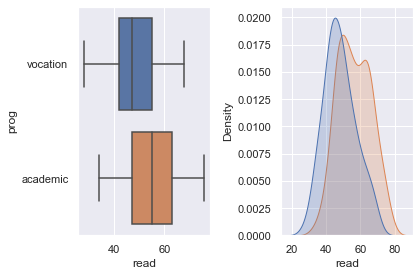

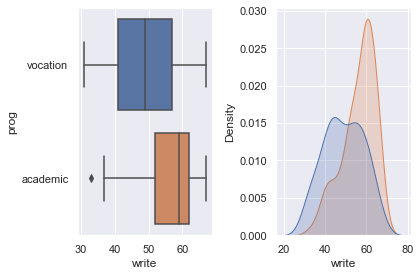

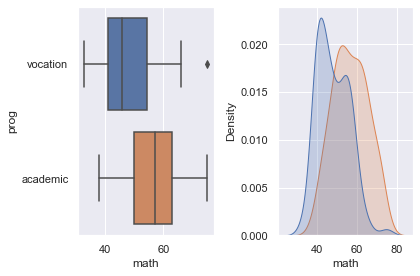

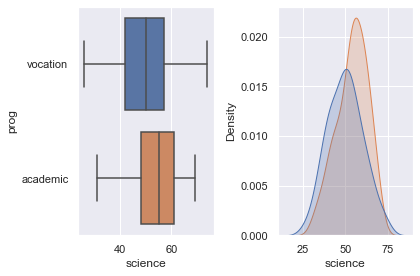

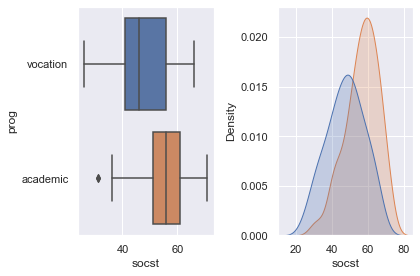

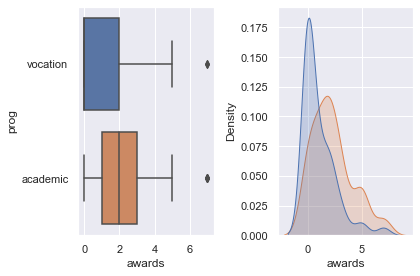

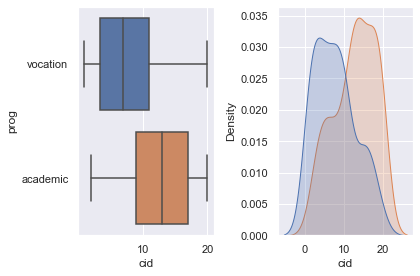

In [17]:
for cols in num:
    fig,(axes0, axes1) = plt.subplots(1,2)
    sns.boxplot(data=df, x=cols, y='prog',ax=axes0)
    sns.kdeplot(data=df,x=cols, hue='prog',ax=axes1,fill=True, legend=False)
    plt.tight_layout()
    plt.show();

### Pairplot : Continuous Features Vs Continuous Features

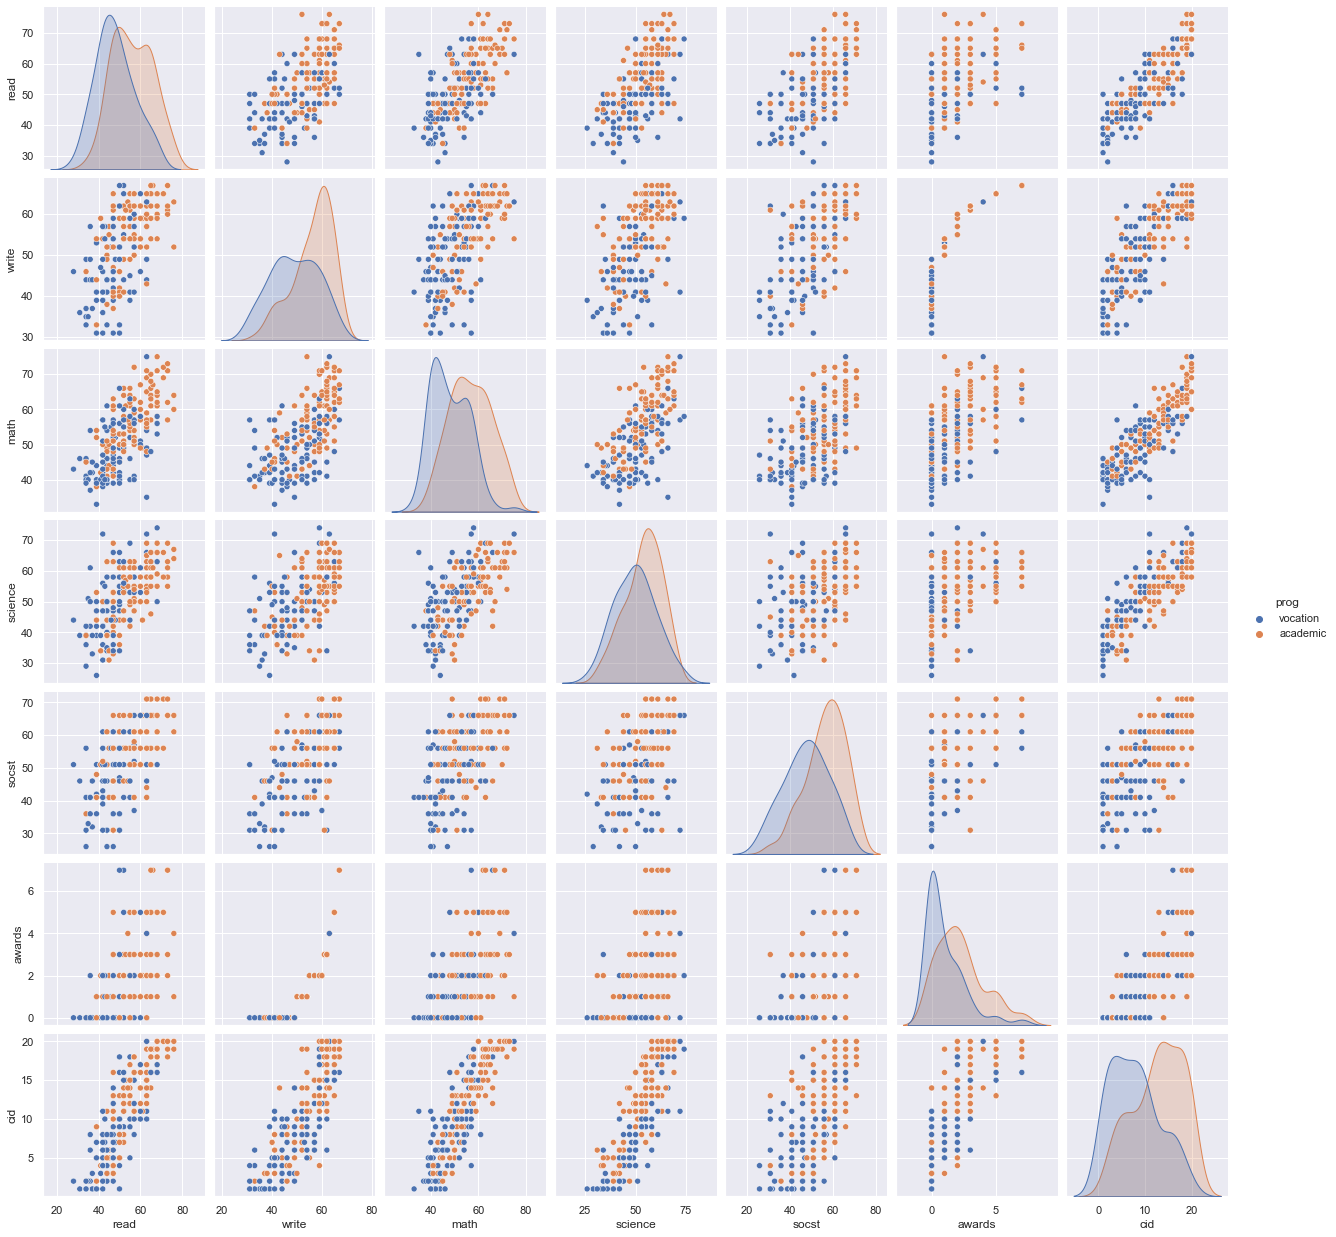

In [18]:
sns.pairplot(df,hue="prog");

### Heatmap : Correlation 

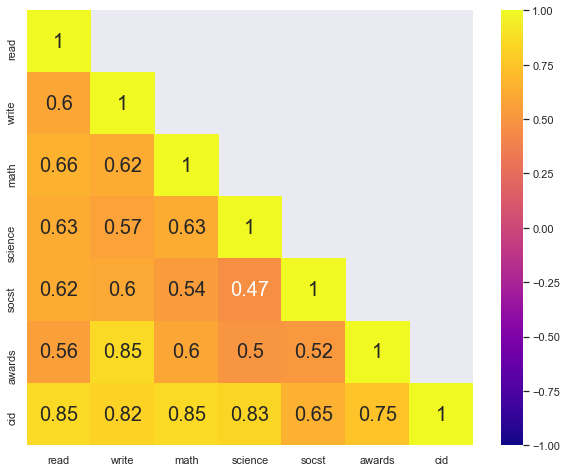

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True, cmap ='plasma',
           vmin=-1,vmax=1,annot_kws={'size':20},
           mask=np.triu(np.ones_like(df.corr(),dtype='bool'),1));
# plt.show()

### Categorical Independent Features vs Target Feature

In [20]:
tab = pd.crosstab(df['prog'],df['female'],normalize='index')
tab

female,female,male
prog,,
academic,0.552381,0.447619
vocation,0.536842,0.463158


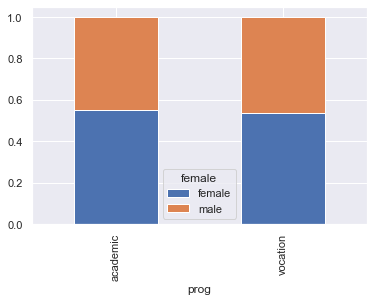

In [21]:
tab.plot(kind='bar',stacked = True);

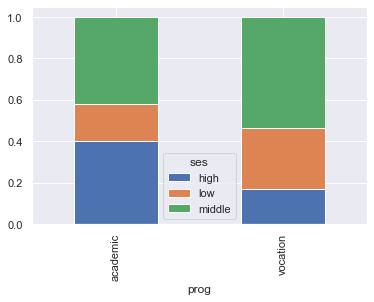

In [22]:
pd.crosstab(df['prog'],df['ses'],normalize='index').plot(kind='bar',stacked = True);

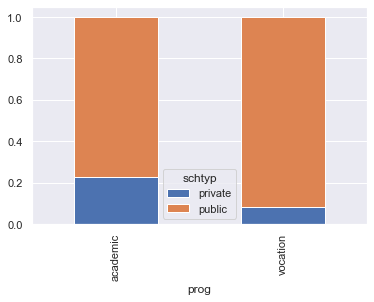

In [23]:
pd.crosstab(df['prog'],df['schtyp'],normalize='index').plot(kind='bar',stacked = True);

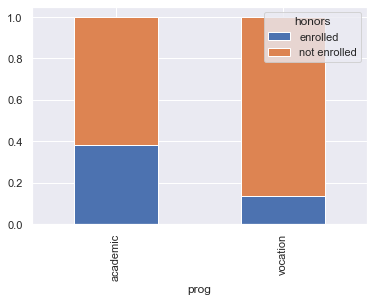

In [24]:
pd.crosstab(df['prog'],df['honors'],normalize='index').plot(kind='bar',stacked = True);

## Outlier Check

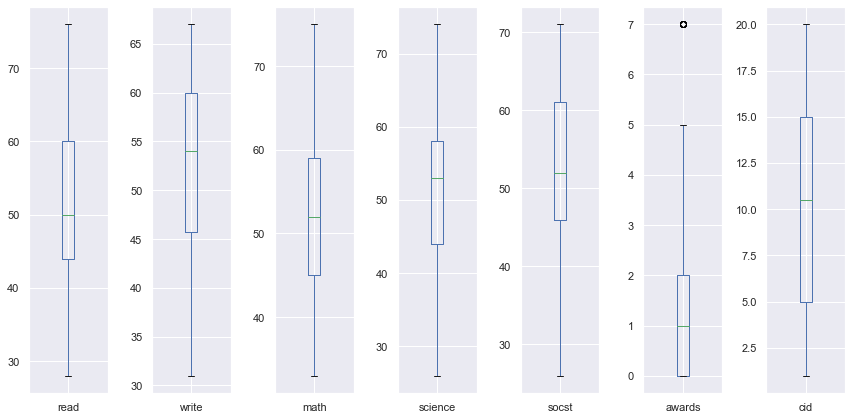

In [25]:
df.plot(kind='box', subplots = True, figsize = (12,6));
plt.tight_layout()

**There are nearly no outliers in most of the numerical columns, only outlier is in award variable. In Gaussian Naive Bayes, outliers will affect the shape of the Gaussian distribution and have the usual effects on the mean etc. So depending on our use case, it makes sense to remove outlier .**

## Outlier treatment

In [26]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [27]:
lr,ur=remove_outlier(df["awards"])
df["awards"]=np.where(df["awards"]>ur,ur,df["awards"])
df["awards"]=np.where(df["awards"]<lr,lr,df["awards"])

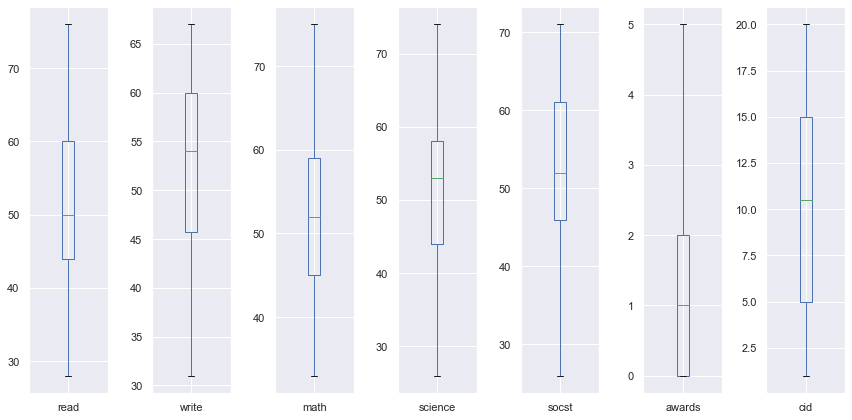

In [28]:
df[num].plot(kind='box', subplots = True, figsize=(12,6))
plt.tight_layout();

# Data Preprocessing

## One-Hot Encoding

In [29]:
cat

['female', 'ses', 'schtyp', 'prog', 'honors']

In [30]:
cat1 = ['female', 'ses', 'schtyp', 'honors'] # removed tgt variable ---> cat.remove('prog')

**Drop First is used to ensure that multiple columns created based on the levels of categorical variable are not included else it will result in to 
multicollinearity . This is done to ensure that we do not land in to dummy trap.**

In [31]:
df =pd.get_dummies(df, columns=cat1,drop_first=True)

In [32]:
df.shape # new shape after encoding

(200, 13)

In [33]:
df.head()

,prog,read,write,math,science,socst,awards,cid,female_male,ses_low,ses_middle,schtyp_public,honors_not enrolled
0,vocation,34,35,41,29,26,0.0,1,0,1,0,1,1
1,vocation,34,33,41,36,36,0.0,1,1,0,1,1,1
2,vocation,39,39,44,26,42,0.0,1,1,0,0,1,1
3,vocation,37,37,42,33,32,0.0,1,1,1,0,1,1
4,vocation,39,31,40,39,51,0.0,1,1,0,1,1,1


# Train-Test Split

**Train-Test Split**
Split X and y into training and test set in 70:30 ratio with random_state=1

In [34]:
# Arrange data into independent variables and dependent variables
X = df.drop("prog",axis=1)  ## Features
y = df["prog"]  ## Target

In [35]:

# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)

# Model Fitting : Gaussian Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

Now GaussianNB classifier is built. The classifier is trained using training data. We can use fit() method for training it. 
After building a classifier, our model is ready to make predictions. We can use predict() method with test set features as its 
parameters.

## Model Evaluation : Training Data

In [41]:
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score

In [42]:
# A user defined function to print out accuracy,conf mx and class. report for a models prediction performance

def eval_model(model, X,y,preds):
    print(f'Accuracy: {accuracy_score(y,preds)}')
    plot_confusion_matrix(model,X,y)
    plt.grid(b=None, axis='both')
    plt.show()
    print(classification_report(y,preds))

In [43]:
y_train_predict = NB_model.predict(X_train)

Accuracy: 0.7428571428571429


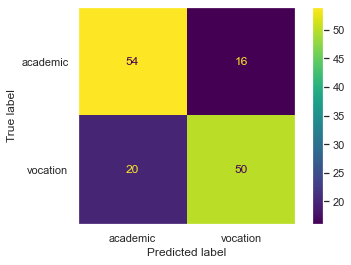

              precision    recall  f1-score   support

    academic       0.73      0.77      0.75        70
    vocation       0.76      0.71      0.74        70

    accuracy                           0.74       140
   macro avg       0.74      0.74      0.74       140
weighted avg       0.74      0.74      0.74       140



In [44]:
eval_model(NB_model,X_train,y_train,y_train_predict)

## Model Evaluation : Test Data

Accuracy: 0.7333333333333333


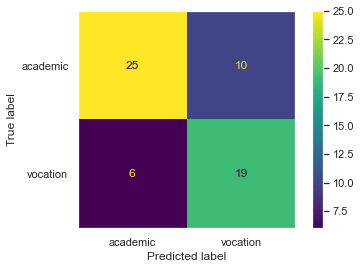

              precision    recall  f1-score   support

    academic       0.81      0.71      0.76        35
    vocation       0.66      0.76      0.70        25

    accuracy                           0.73        60
   macro avg       0.73      0.74      0.73        60
weighted avg       0.74      0.73      0.74        60



In [45]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
eval_model(NB_model,X_test,y_test,y_test_predict)

**Looking at Recalls, Training accuracy and Test accuracy. Model seems to be performing well

For naive bayes algorithm while calculating likelihoods of numerical features it assumes the feature to be normally distributed and then we calculate probability using mean and variance of that feature only and also it assumes that all the predictors are independent to each other. Scale doesn’t matter. Performing a features scaling in this algorithms may not have much effect.

# Model Fitting : KNN Model

**Generally, good KNN performance usually requires preprocessing of data to make all variables similarly scaled and centered** since KNN uses the 'distance' calculations.

We will use Standardscaler to achieve this objective.

In [46]:
# Arrange data into independent variables and dependent variables
X =  df.drop("prog",axis=1) ## Features
y = df["prog"]  ## Target

## Train- Test Split

In [47]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=10)

## Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
X_train.mean(axis=0) # verify the column means are 0 post scaling

array([-6.34413157e-17,  1.72084569e-16,  3.64787565e-17, -2.85485921e-17,
       -2.09356342e-16, -5.55111512e-18, -1.49087092e-16,  6.97854473e-17,
        5.07530526e-17,  2.53765263e-17,  4.12368552e-17,  6.34413157e-18])

In [50]:
X_train.std(axis=0) # verify that column std are all 1 post scaling

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [51]:
from sklearn.neighbors import KNeighborsClassifier # RadiusNeighborsClassifier

In [52]:
KNN_model=KNeighborsClassifier() # number of neighbours by default is 5
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

## Model Evaluation : Training Data

In [53]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)

Accuracy: 0.7928571428571428


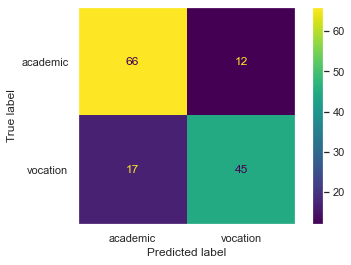

              precision    recall  f1-score   support

    academic       0.80      0.85      0.82        78
    vocation       0.79      0.73      0.76        62

    accuracy                           0.79       140
   macro avg       0.79      0.79      0.79       140
weighted avg       0.79      0.79      0.79       140



In [54]:
eval_model(KNN_model,X_train,y_train,y_train_predict)

## Model Evaluation : Test Data

In [55]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)

Accuracy: 0.7


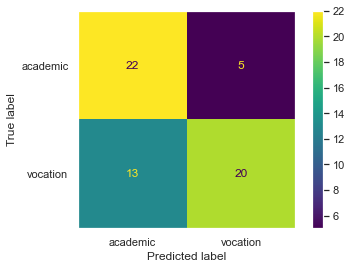

              precision    recall  f1-score   support

    academic       0.63      0.81      0.71        27
    vocation       0.80      0.61      0.69        33

    accuracy                           0.70        60
   macro avg       0.71      0.71      0.70        60
weighted avg       0.72      0.70      0.70        60



In [56]:
eval_model(KNN_model,X_test,y_test,y_test_predict)

## KNN Model : k=7

**Default value n_neighbors=5, lets check the performance for K=7**

In [57]:
# from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

## Model Evaluation : Training Data

In [58]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)

Accuracy: 0.7285714285714285


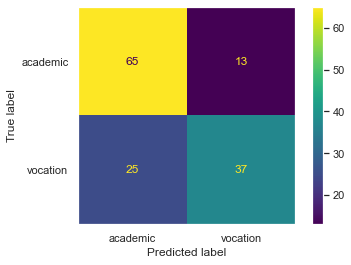

              precision    recall  f1-score   support

    academic       0.72      0.83      0.77        78
    vocation       0.74      0.60      0.66        62

    accuracy                           0.73       140
   macro avg       0.73      0.72      0.72       140
weighted avg       0.73      0.73      0.72       140



In [59]:
eval_model(KNN_model,X_train,y_train,y_train_predict)

## Model Evaluation : Test Data

In [60]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)

Accuracy: 0.7166666666666667


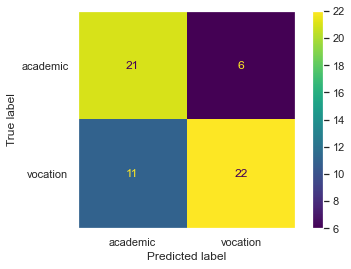

              precision    recall  f1-score   support

    academic       0.66      0.78      0.71        27
    vocation       0.79      0.67      0.72        33

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.73      0.72      0.72        60



In [61]:
eval_model(KNN_model,X_test,y_test,y_test_predict)

## Best Value of K

**Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error**

Hint: Misclassification error **(MCE) = 1 - Test accuracy score.** Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [62]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores] # this technique is called list comprehension
MCE

[0.35,
 0.2833333333333333,
 0.30000000000000004,
 0.2833333333333333,
 0.25,
 0.19999999999999996,
 0.25,
 0.25,
 0.21666666666666667,
 0.21666666666666667]

**Plot misclassification error vs k (with k value on X-axis) using matplotlib**

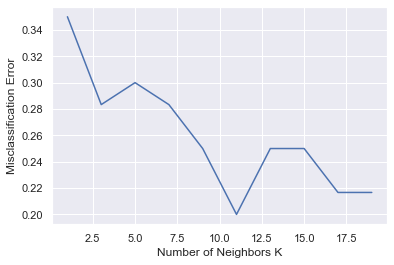

In [63]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error');

For K = 11 it is giving the best test accuracy (lowest error), so lets check train and test performance for KNN model with K=11.

In [64]:
KNN_model=KNeighborsClassifier(n_neighbors=11)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

## Model Evaluation - Best K Model

In [65]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)

Accuracy: 0.7071428571428572


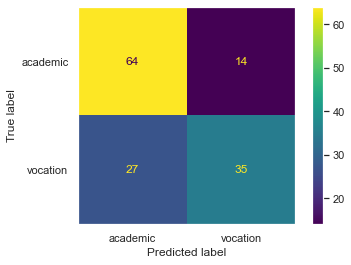

              precision    recall  f1-score   support

    academic       0.70      0.82      0.76        78
    vocation       0.71      0.56      0.63        62

    accuracy                           0.71       140
   macro avg       0.71      0.69      0.69       140
weighted avg       0.71      0.71      0.70       140



In [66]:
eval_model(KNN_model,X_train,y_train,y_train_predict)

In [67]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)

Accuracy: 0.8


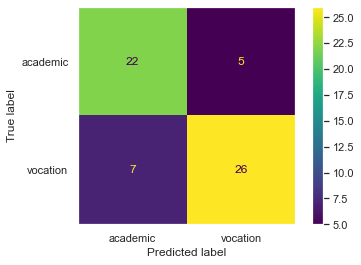

              precision    recall  f1-score   support

    academic       0.76      0.81      0.79        27
    vocation       0.84      0.79      0.81        33

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



In [68]:
eval_model(KNN_model,X_test,y_test,y_test_predict)

# Conclusion

The knn model with k parameter of 11 delivers the best performance on prediction accuracy on test data set. The performance metrics on test data set is comparable to that of the training data set performance and hence the model is not overfitted and can be used for predictions on production.

Happy Learning